<h1>Introduction To Sampling Algorithms</h1>

The following code implements the rejection sampling and the inverse transform sampling algorithm. <br/>
To run the example, click on each of the following code-blocks and press the "run"-button in the menu on top of this page. <br/>
Follow the comments in each code-block to understand the commands executed in each step.

Note: Some warnings may be generated while execution. These warnings can be ignored.

In [188]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

<h2>A. Rejection Sampling </h2>

A.1. Define functions f(x) and g(x) for the target distribution 'f' and the proposal distribution 'g' respectively.

In [189]:
# Target distribution: Bimodal distribution
def target_distribution(x):
    gaussian1 = 0.6 * (1 / (np.sqrt(2 * np.pi) * 1)) * np.exp(-0.5 * ((x + 2) / 1)**2)
    gaussian2 = 0.4 * (1 / (np.sqrt(2 * np.pi) * 0.5)) * np.exp(-0.5 * ((x - 2) / 0.5)**2)
    return gaussian1 + gaussian2

In [190]:
# Proposal distribution: Uniform distribution
def proposal_distribution(x, a, b):
    return 1/(b-a) if a <= x <= b else 0

A.2. Determine the scale factor M such that M.g(x) >= f(x)

In [191]:
# Scale factor (M)
def scale_factor(a, b):
  max_target_distribution = minimize_scalar(lambda x: -target_distribution(x), bounds=(a,b), method='bounded')
  max_target_distribution_value = -max_target_distribution.fun

  max_proposal_distribution = minimize_scalar(lambda x: -proposal_distribution(x,a,b), bounds=(a,b), method='bounded')
  max_proposal_distribution_value = -max_proposal_distribution.fun

  M = 1.4*max_target_distribution_value/max_proposal_distribution_value
  return M

A.3. Acquire samples with rejection sampling

In [192]:
# Define the number of samples required
num_samples = 10000
accepted_samples = []
all_samples = []
rejected_samples = []

a = -5
b = 5
M = scale_factor(a, b)

for _ in range(num_samples):
    x_candidate = np.random.uniform(a, b)
    u = np.random.uniform(0, M * proposal_distribution(x_candidate, a, b))
    all_samples.append(x_candidate)

    # Accept-Reject criterion
    if u <= target_distribution(x_candidate):
        accepted_samples.append(x_candidate)

rejected_samples = [item for item in all_samples if item not in accepted_samples]

A.4. Plot the results

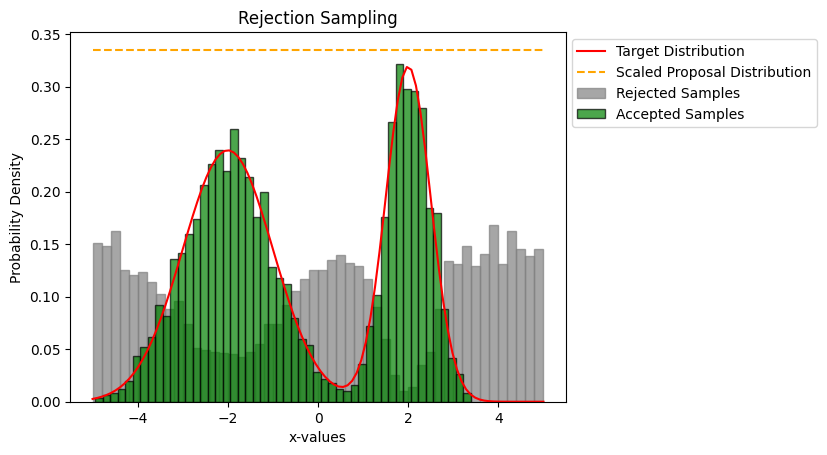

In [193]:
# Plotting the results
x_values = np.linspace(a, b, 100)
target_values = target_distribution(x_values)
proposal_values = M * np.array([proposal_distribution(x, a, b) for x in x_values])

# Plot the target distribution
plt.plot(x_values, target_values, label='Target Distribution', color='red')

# Plot the scaled proposal distribution
plt.plot(x_values, proposal_values, label='Scaled Proposal Distribution', linestyle='--', color='orange')

# Plot the rejected samples
plt.hist(rejected_samples, bins=50, density=True, alpha=0.7, color='gray', edgecolor='gray', label='Rejected Samples')

# Plot the accepted samples
plt.hist(accepted_samples, bins=50, density=True, alpha=0.7, color='green', edgecolor='black', label='Accepted Samples')

plt.title('Rejection Sampling')
plt.xlabel('x-values')
plt.ylabel('Probability Density')
plt.legend(loc='upper right', bbox_to_anchor=(1.52, 1))
plt.show()

A.5. Results


*   The histogram with green bars represents the accepted samples and the one with gray bars represents the rejected samples.
*   The density of the samples rejected is more in the area where the frequency of the target distribution is less. This implies less samples are taken from this region.
*   The density of the samples rejected is less (shown in the background) in the area where the frequency of the target distribution is more. This implies more samples are taken from this region.
*   Hence, the sampled values follow the target distribution.



<h2>B. Inverse Transform Sampling </h2>

B.1. Define the probability distribution function (PDF), cumulative distribution function (CDF) and inverse CDF of the target distribution.

In [194]:
# PDF of exponential Distribution
def pdf_exponential(x, lambda_parameter):
  return lambda_parameter * np.exp(-lambda_parameter * x_values)

In [195]:
# CDF of exponential Distribution
def cdf_exponential(x, lambda_parameter):
    return 1 - np.exp(-lambda_parameter * x)

In [196]:
# Inverse CDF of exponential distribution
def inverse_cdf_exponential(uniform_samples, lambda_parameter):
  return -np.log(1 - uniform_samples) / lambda_parameter

B.2. Perform inverse transform sampling.

In [197]:
def inverse_transform_sampling(num_samples, lambda_parameter):
    # Generate random uniform samples
    uniform_samples = np.random.uniform(0, 1, num_samples)

    # Apply the inverse of the exponential CDF to obtain samples
    inverse_samples = inverse_cdf_exponential(uniform_samples, lambda_parameter)

    return inverse_samples

B.3. Acquire samples with inverse transform sampling.

In [198]:
# Parameter for the exponential distribution
lambda_parameter = 0.5

# Number of samples required
num_samples = 10000

# Generate samples using inverse transform sampling
samples = inverse_transform_sampling(num_samples, lambda_parameter)

B.4. Plot the results

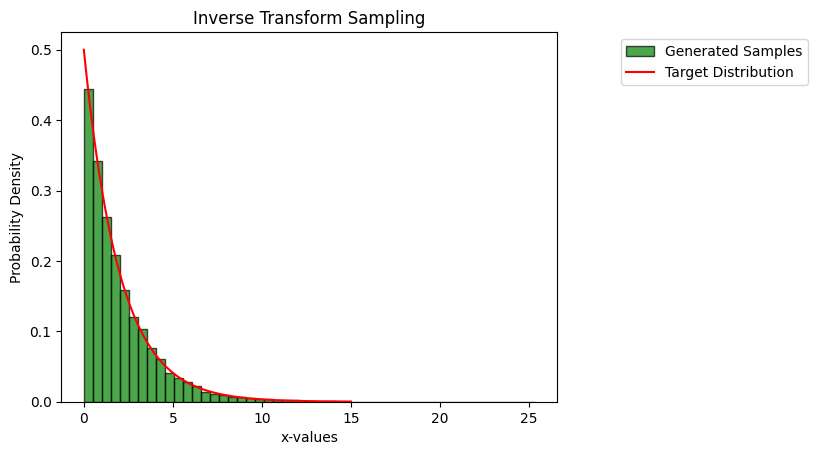

In [199]:
# Plot the generated samples and the theoretical exponential distribution
plt.hist(samples, bins=50, density=True, alpha=0.7, color='green', edgecolor='black', label='Generated Samples')

# Plot the true exponential distribution for comparison
x_values = np.linspace(0, 15, 100)
pdf_values = pdf_exponential(x_values, lambda_parameter)
plt.plot(x_values, pdf_values, color='red', label='Target Distribution')

plt.title('Inverse Transform Sampling')
plt.xlabel('x-values')
plt.ylabel('Probability Density')
plt.legend(loc='upper right', bbox_to_anchor=(1.52, 1))
plt.show()

B.5. Results

As can be seen in the figure above, the generated samples, visualized by the histogram with green bars, follow the target distribution, i.e., exponential curve visualized in red.